# Vanilla Options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns

In [2]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

In [3]:
# underlying_price 
S = 67.54

# the premium
call_premium = 10.45

# strike price
K = 70.85

In [76]:
def option_payoff_at_maturity(strike, premium, option="call", position="long"):
    # underlying prices
    underlying_prices = np.linspace(0, 2*strike, 100)
    
    # strike prices (repeated)
    strike_prices = np.repeat(strike, underlying_prices.shape[0]) 
    
    # call premiums (repeated)
    premiums = np.repeat(premium, underlying_prices.shape[0])

    # vector of zeros
    zeros = np.repeat(0, underlying_prices.shape[0])
        
    if option is "call" and position is "long": 
        call_payoff = np.maximum(underlying_prices - strike_prices, zeros)
        return pd.Series(call_payoff - premiums, index=underlying_prices, name="call payoff")

    elif option is "call" and position is "short":
        call_payoff = - np.maximum(underlying_prices - strike_prices, zeros)
        return pd.Series(call_payoff + premiums, index=underlying_prices, name="call payoff")

    elif option is "put" and position is "long":
        put_payoff = np.maximum(strike_prices - underlying_prices, zeros)
        return pd.Series(put_payoff - premiums, index=underlying_prices, name="put payoff")

    elif option is "put" and position is "short":
        put_payoff = - np.maximum(strike_prices - underlying_prices, zeros)
        return pd.Series(put_payoff + premiums, index=underlying_prices, name="put payoff")
    
    else:
        raise ValueError("Error in option type or position")
        
    
    
'''
def option_plot(option, strike,  option_type="call", position="long"):
    fs = 12
    option.plot(grid=True, figsize=(7,4), label=None)
    plt.axhline(y=0.0, linestyle="--", linewidth=1.0, color="k", label=None)
    plt.axvline(x=strike, linestyle="-.", linewidth=1.3, label="strike price K")
    plt.title("{} {}".format(option_type,position), fontsize=fs)
    plt.xlabel("underlying price", fontsize=fs)
    plt.legend()
'''

def normal_pdf(x, mu=0, std=1):
    '''
    Standard normal probability density function
    '''
    return   1.0 / ((2*np.pi*std)**(0.5)) * np.exp( 0.5*(x-mu)*(x-mu)  )

In [78]:
norm_pdf(-2, 1,2)

TypeError: norm_pdf() takes 1 positional argument but 3 were given

In [56]:
call_long_at_maturity  = option_payoff_at_maturity(K, call_premium, option="call", position="long")
call_short_at_maturity = option_payoff_at_maturity(K, call_premium, option="call", position="short")

put_long_at_maturity  = option_payoff_at_maturity(K, call_premium, option="put", position="long")
put_short_at_maturity = option_payoff_at_maturity(K, call_premium, option="put", position="short")

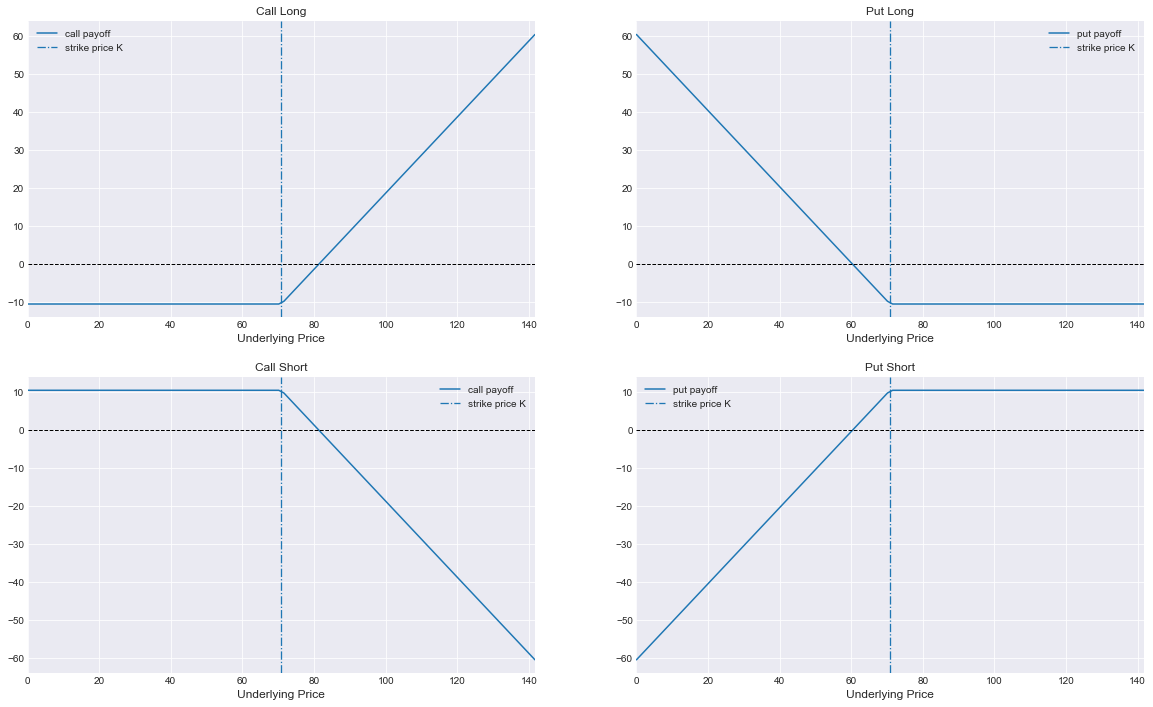

In [63]:
fig, ax = plt.subplots(2,2,figsize=(20,12))
ax = ax.flatten()

# Call Long
call_long_at_maturity.plot(ax=ax[0], grid=True, label=None)
ax[0].axhline(y=0.0, linestyle="--", linewidth=1.0, color="k", label=None)
ax[0].axvline(x=K, linestyle="-.", linewidth=1.3, label="strike price K")
ax[0].set_title("Call Long", fontsize=12)
ax[0].set_xlabel("Underlying Price", fontsize=12)
ax[0].legend()

# Put Long
put_long_at_maturity.plot(ax=ax[1], grid=True, label=None)
ax[1].axhline(y=0.0, linestyle="--", linewidth=1.0, color="k", label=None)
ax[1].axvline(x=K, linestyle="-.", linewidth=1.3, label="strike price K")
ax[1].set_title("Put Long", fontsize=12)
ax[1].set_xlabel("Underlying Price", fontsize=12)
ax[1].legend()

# Call Short
call_short_at_maturity.plot(ax=ax[2], grid=True, label=None)
ax[2].axhline(y=0.0, linestyle="--", linewidth=1.0, color="k", label=None)
ax[2].axvline(x=K, linestyle="-.", linewidth=1.3, label="strike price K")
ax[2].set_title("Call Short", fontsize=12)
ax[2].set_xlabel("Underlying Price", fontsize=12)
ax[2].legend()

# Put Short
put_short_at_maturity.plot(ax=ax[3], grid=True, label=None)
ax[3].axhline(y=0.0, linestyle="--", linewidth=1.0, color="k", label=None)
ax[3].axvline(x=K, linestyle="-.", linewidth=1.3, label="strike price K")
ax[3].set_title("Put Short", fontsize=12)
ax[3].set_xlabel("Underlying Price", fontsize=12)
ax[3].legend()

plt.show()